dependencies

In [70]:
import imblearn.over_sampling as over
import imblearn.under_sampling as under
import imblearn.combine as combine
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

importing data

In [71]:
data = pd.read_csv("data/processed.csv", header=None)

data.columns = data.iloc[0]
data = data.iloc[1:]

data = data.apply(pd.to_numeric)
print(data.columns)
print(data.shape)
data.head()

Index(['Age', 'Education', 'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore',
       'Impulsive', 'SS', 'country_Canada', 'country_New_Zealand',
       'country_Other', 'country_Republic_of_Ireland', 'country_UK',
       'country_USA', 'country_Australia', 'gender_F', 'gender_M', 'eth_Black',
       'eth_Mixed-Black/Asian', 'eth_Mixed-White/Asian',
       'eth_Mixed-White/Black', 'eth_Other', 'eth_White', 'eth_Asian',
       'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
       'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD',
       'Meth', 'Mushrooms', 'Nicotine', 'VSA'],
      dtype='object', name=0)
(1876, 43)


0  Age  Education    Nscore    Escore    Oscore    AScore    Cscore  \
1    2          9  0.413474  0.796106  0.762567  0.609827  0.479394   
2    3          5  0.444788  0.622976  0.392939  0.266061  0.353580   
3    1          8  0.492045  0.376883  0.527023  0.585213  0.584415   
4    3          9  0.623275  0.250544  0.456995  0.456454  0.688508   
5    6          4  0.413474  0.454133  0.278311  0.794386  0.735380   

0  Impulsive        SS  country_Canada  ...  Crack  Ecstasy  Heroin  Ketamine  \
1   0.337920  0.465658               0  ...      0        1       0         0   
2   0.215401  0.619957               0  ...      0        0       0         0   
3   0.215401  0.224398               0  ...      0        0       0         0   
4   0.428474  0.465658               0  ...      0        0       0         0   
5   0.215401  0.132468               1  ...      0        0       0         0   

0  Legalh  LSD  Meth  Mushrooms  Nicotine  VSA  
1       0    0     1          0         1    0  
2       0    0     0          0         0    0  
3       0    0     0          0         0    0  
4       0    0     0          0         0    0  
5       0    0     0          0         1    0  

[5 rows x 43 columns]

In [72]:
X = data.iloc[:,0:24]
Y = data.iloc[:,25:]

print(X)
print(Y)

0     Age  Education    Nscore    Escore    Oscore    AScore    Cscore  \
1       2          9  0.413474  0.796106  0.762567  0.609827  0.479394   
2       3          5  0.444788  0.622976  0.392939  0.266061  0.353580   
3       1          8  0.492045  0.376883  0.527023  0.585213  0.584415   
4       3          9  0.623275  0.250544  0.456995  0.456454  0.688508   
5       6          4  0.413474  0.454133  0.278311  0.794386  0.735380   
...   ...        ...       ...       ...       ...       ...       ...   
1872    1          6  0.336890  0.765875  0.835399  0.609827  0.335773   
1873    1          6  0.477550  0.765875  0.624600  0.609827  0.280854   
1874    2          7  0.682246  0.289795  0.323599  0.244253  0.300104   
1875    1          6  0.649318  0.206510  0.577652  0.266061  0.128634   
1876    1          6  0.444788  0.824839  0.798385  0.660789  0.560031   

0     Impulsive        SS  country_Canada  ...  country_USA  \
1      0.337920  0.465658               0  ...  

plotting functions

In [73]:
# plotting original data, always in 'before' slot
def plot_before_scatter(subplot, X_before, y_before, var1, var2):
    counts = y_before.value_counts().sort_index()

    sb.scatterplot(
        x=X_before[var1],
        y=X_before[var2],
        hue=y_before,

        alpha=0.4,
        ax=subplot[0],
        palette={0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c'}
    )

    subplot[0].set_title(
        f"Before\nNot at Risk: {counts.get(0, 0)}, Potential Risk: {counts.get(1, 0)}"
    )

    # Custom legend labels
    label_map = {0: 'Not at Risk', 1: 'Potential Risk'}
    handles, labels = subplot[0].get_legend_handles_labels()
    new_labels = [label_map[int(l)] if l.isdigit() else l for l in labels]
    subplot[0].legend(handles, new_labels, title='Risk Level')


In [74]:
# plotting comparison after transformation
def plot(X_before, y_before, resampler, title, var1, var2):

  X_after, y_after = resampler.fit_resample(X_before, y_before)

  X_after = pd.DataFrame(X_after, columns=X.columns)
  y_after = pd.Series(y_after)

  counts_new = y_after.value_counts().sort_index()

  fig, axes = plt.subplots(1, 2, figsize=(16,6))

  plot_before_scatter(axes, X_before, y_before, var1, var2)

  sb.scatterplot(
      x=X_after[var1],
      y=X_after[var2], 
      hue=y_after, 
      
      alpha=0.4, 
      ax=axes[1],
      palette={0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c'}
  )

  counts_new = y_after.value_counts().sort_index()
  axes[1].set_title(
        f"{title}\nNot at Risk: {counts_new.get(0, 0)}, Potential Risk: {counts_new.get(1, 0)}"
    )
  
  # Custom legend labels
  label_map = {0: 'Not at Risk', 1: 'Potential Risk'}
  handles, labels = axes[1].get_legend_handles_labels()
  new_labels = [label_map[int(l)] if l.isdigit() else l for l in labels]
  axes[1].legend(handles, new_labels, title='Risk Level')

  plt.tight_layout()

  return X_after, y_after

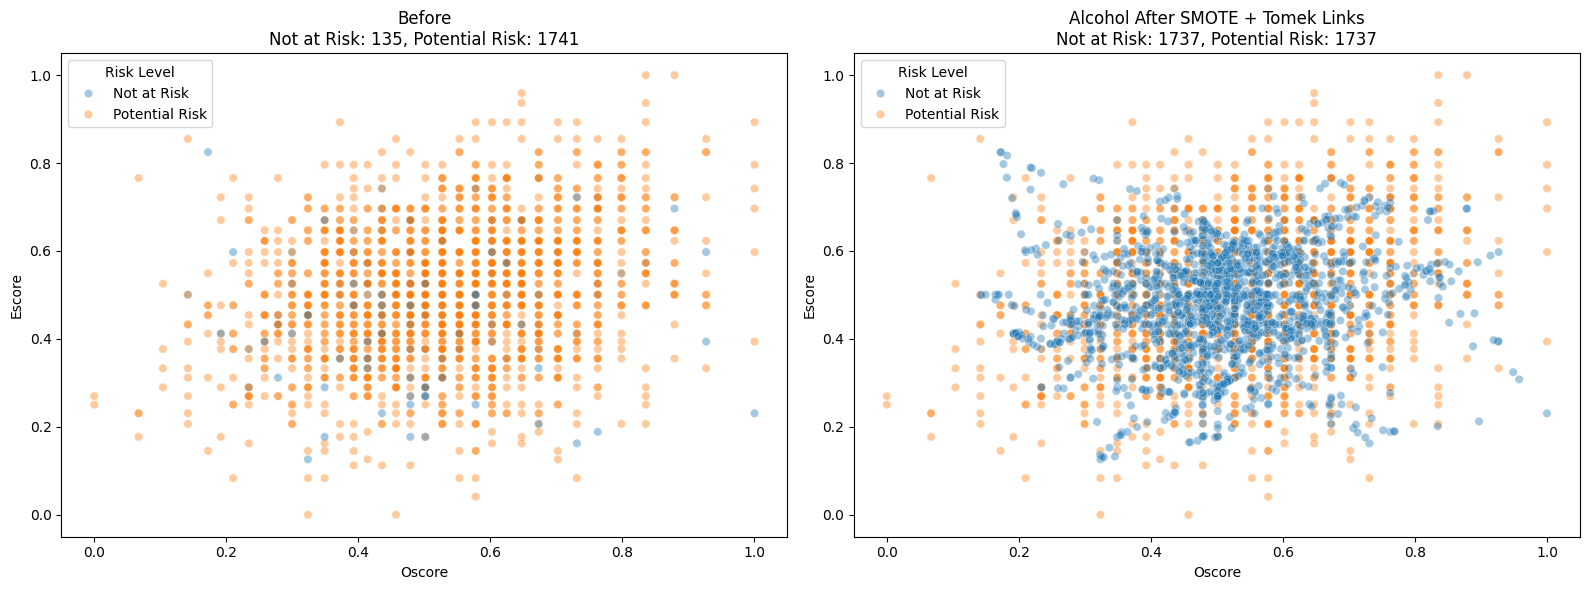

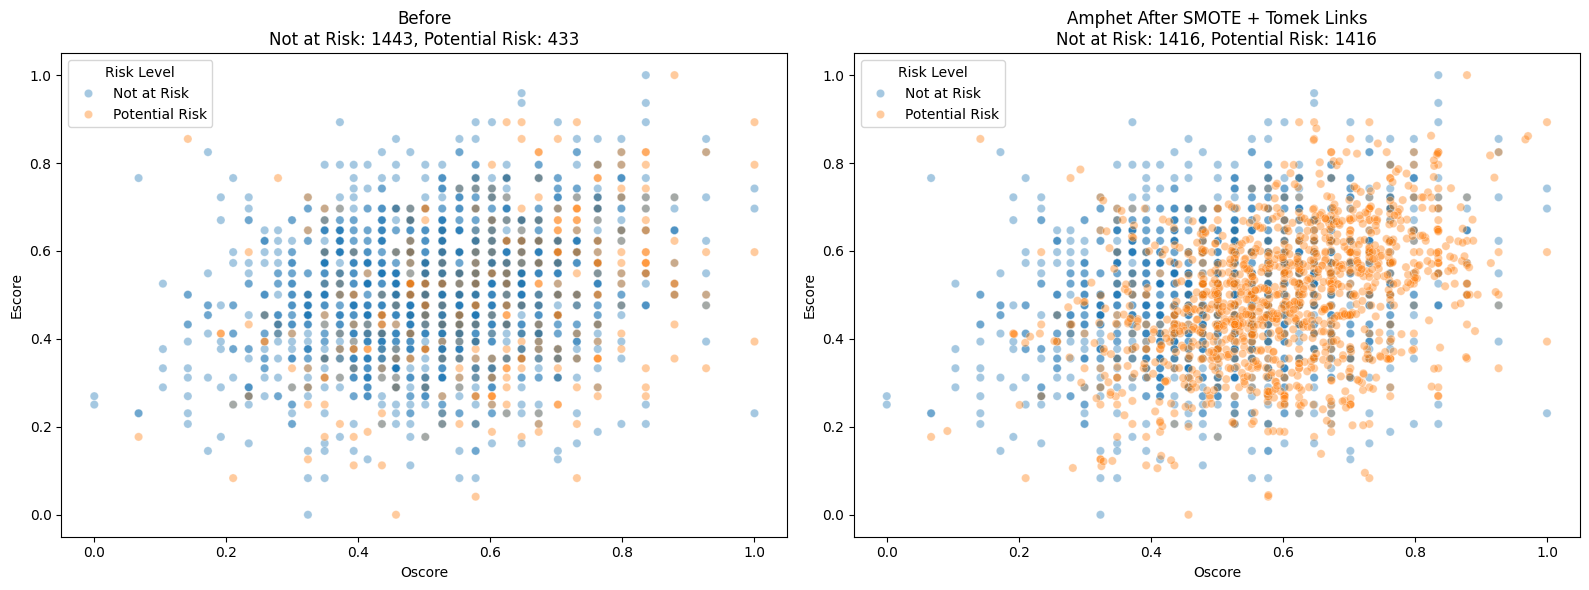

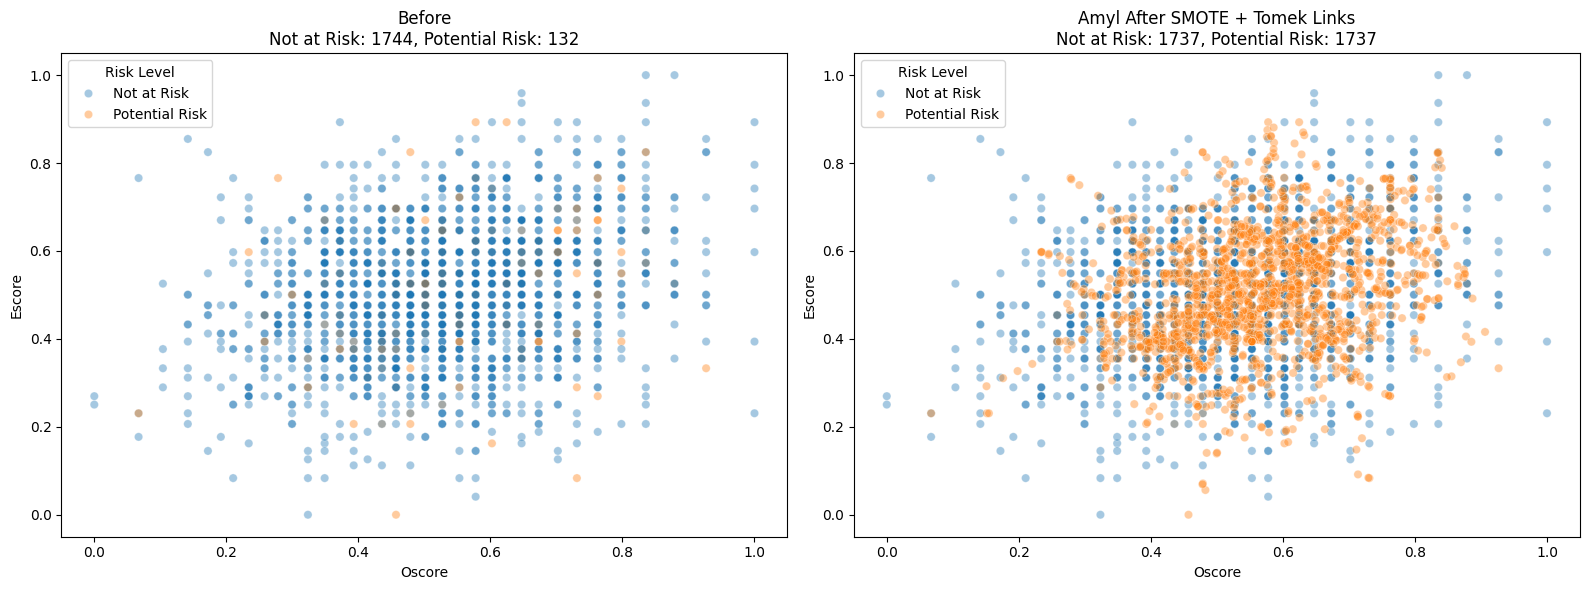

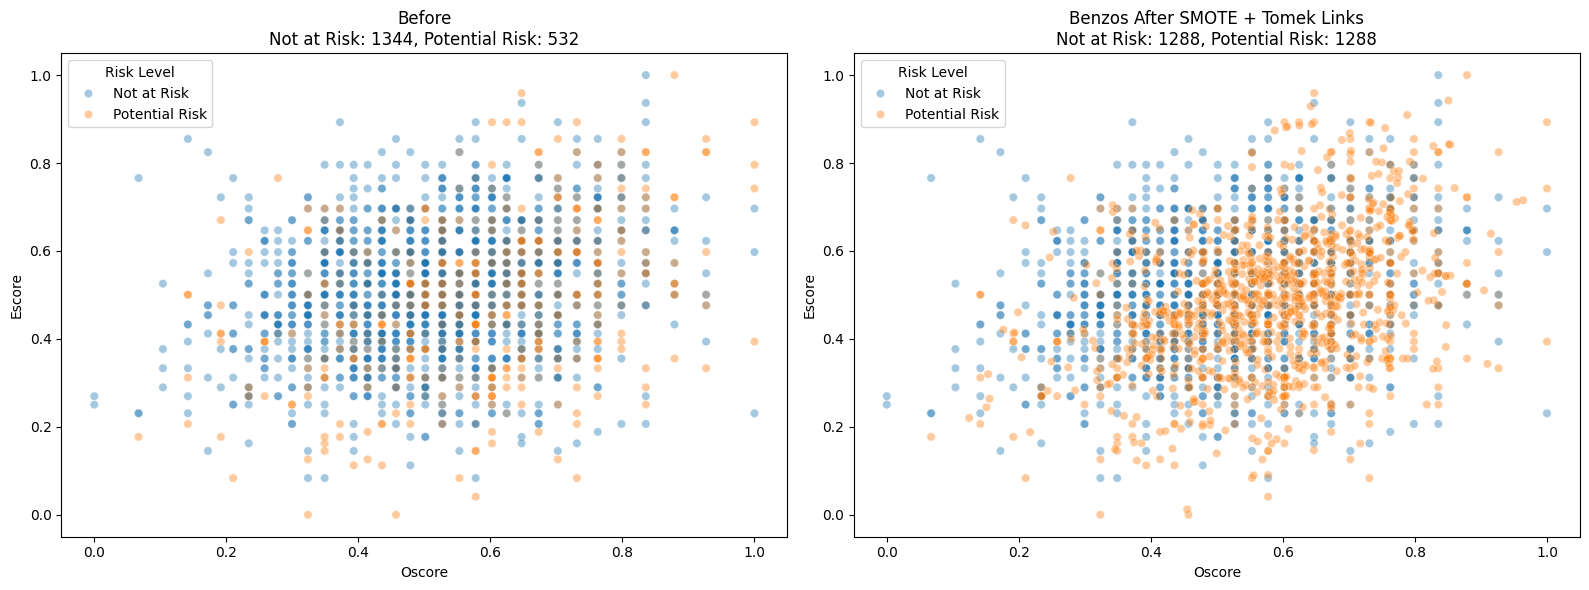

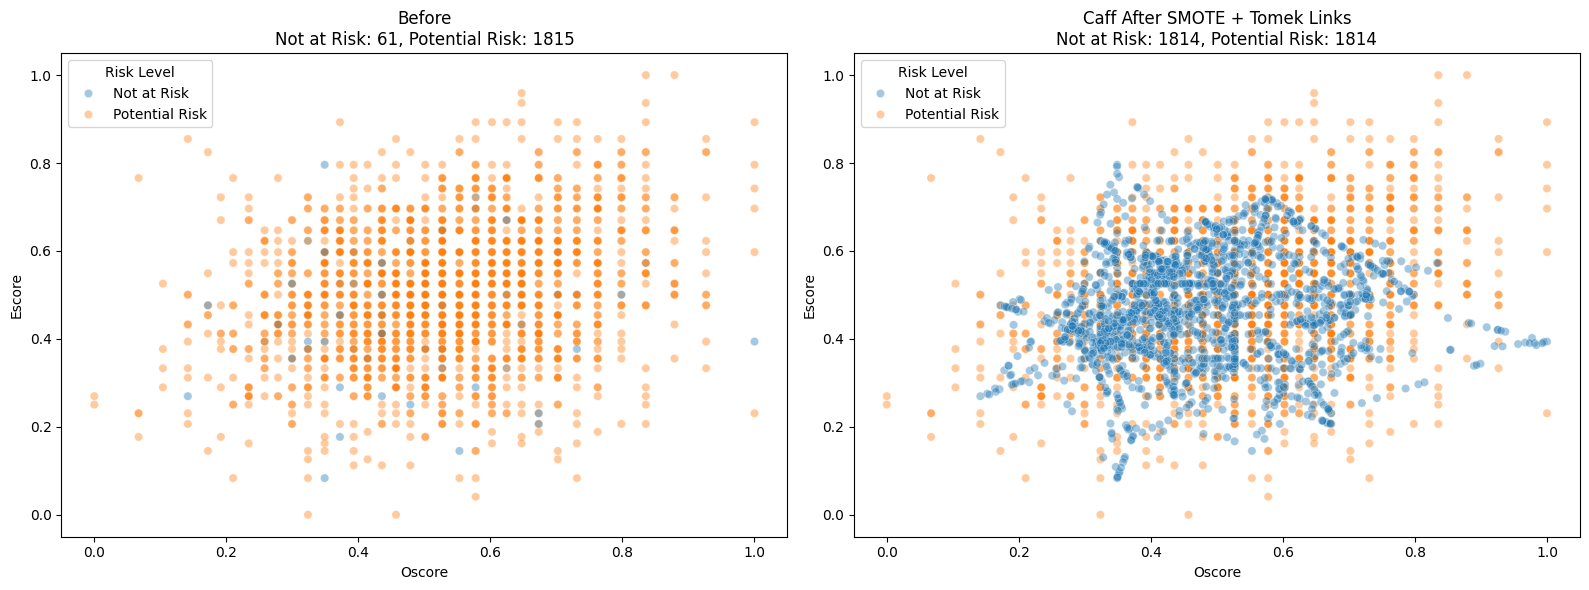

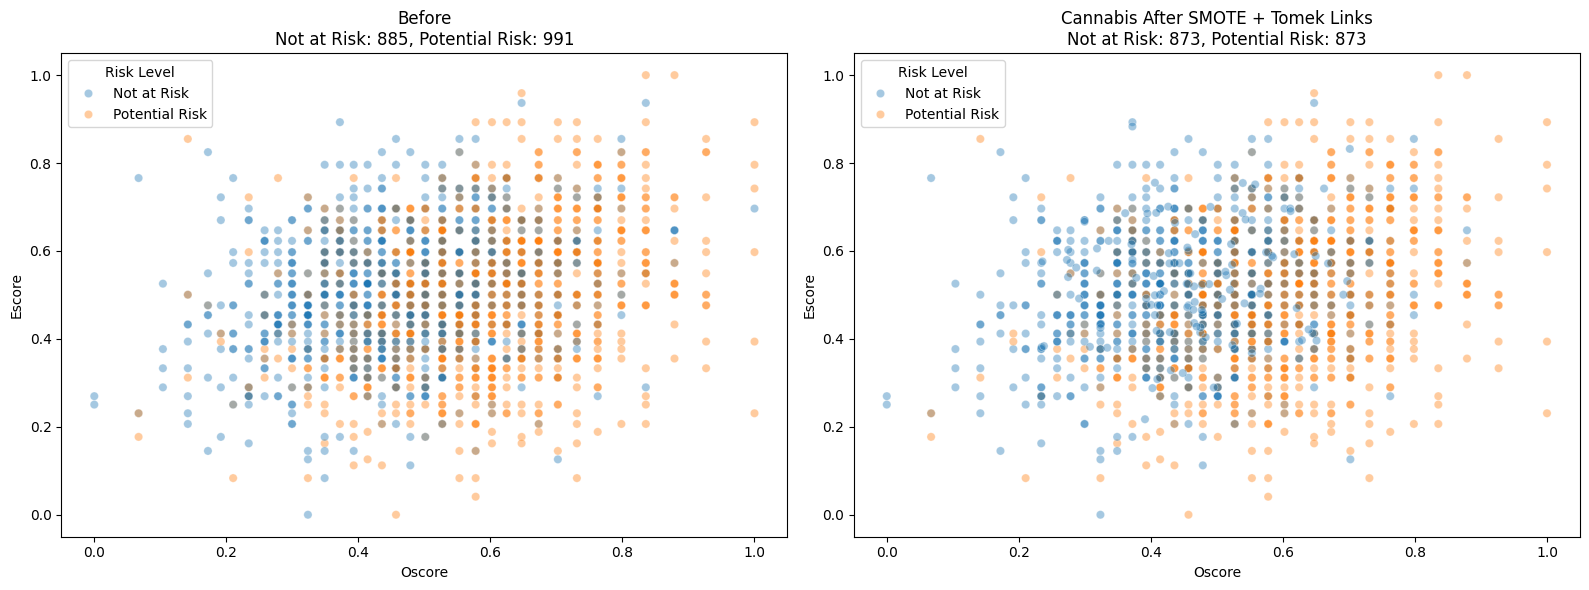

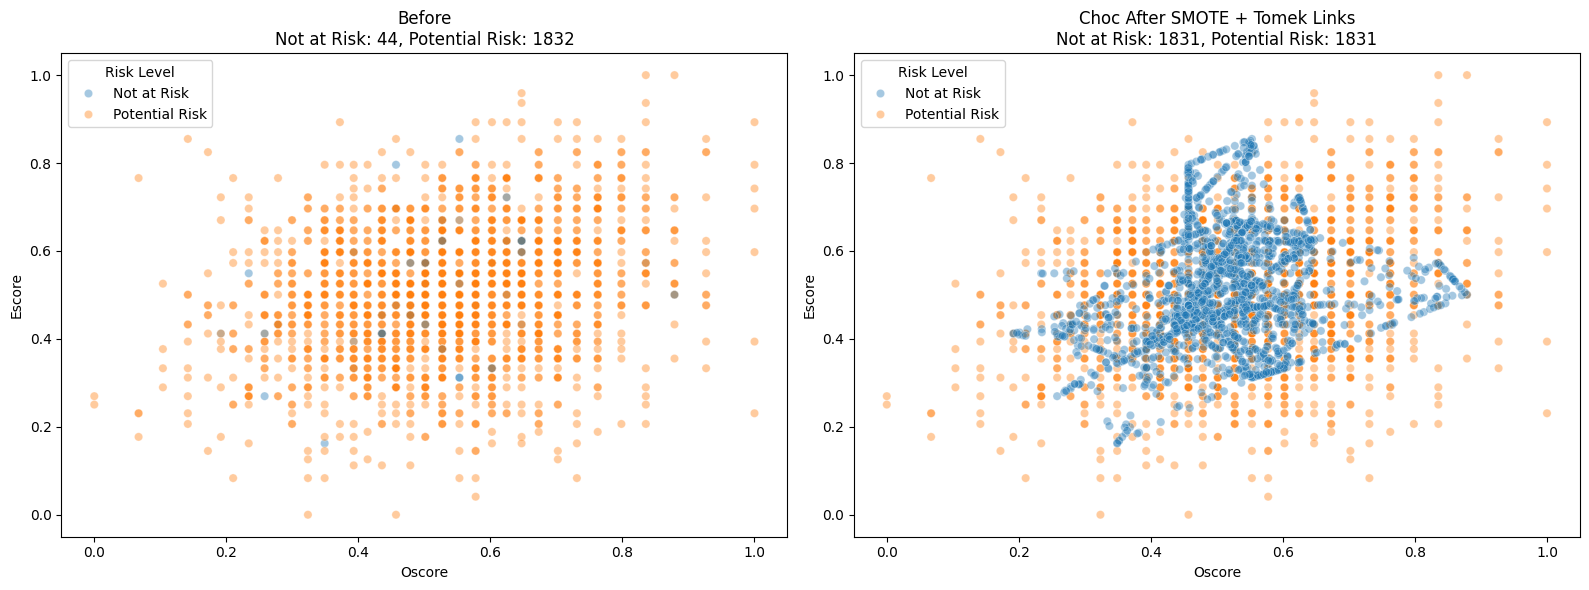

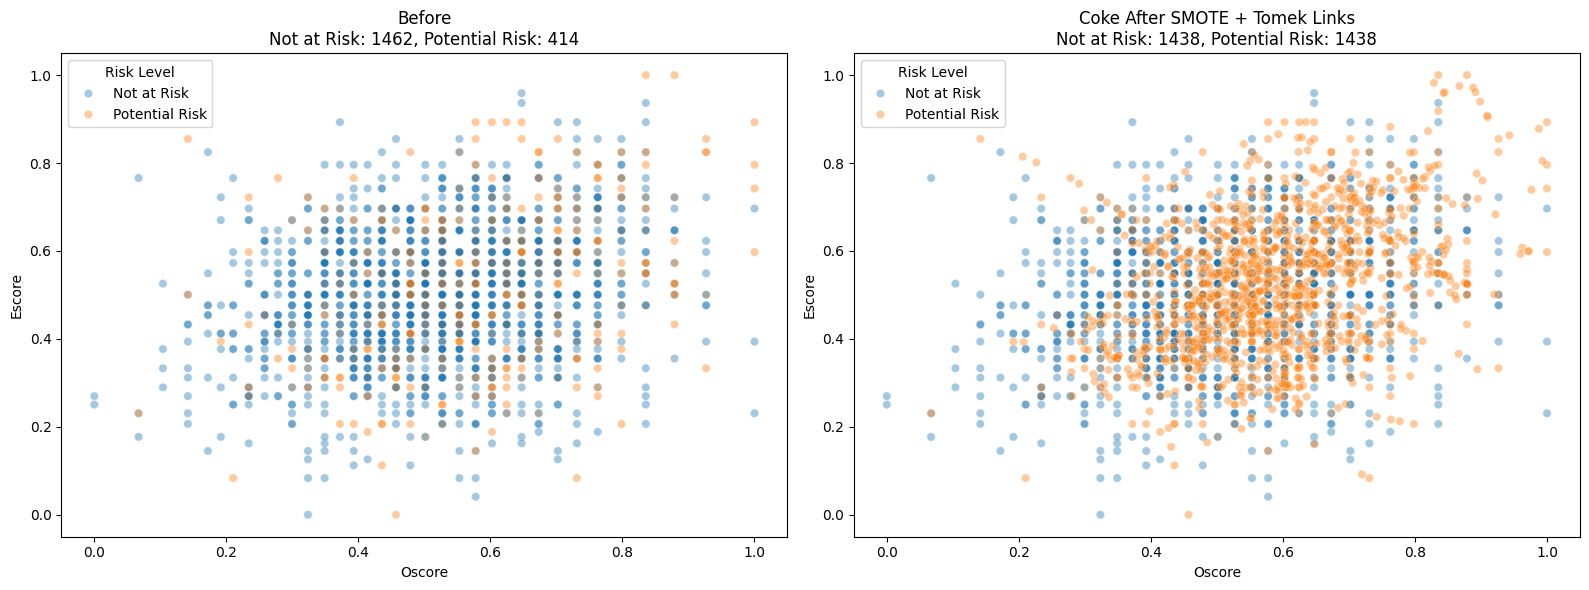

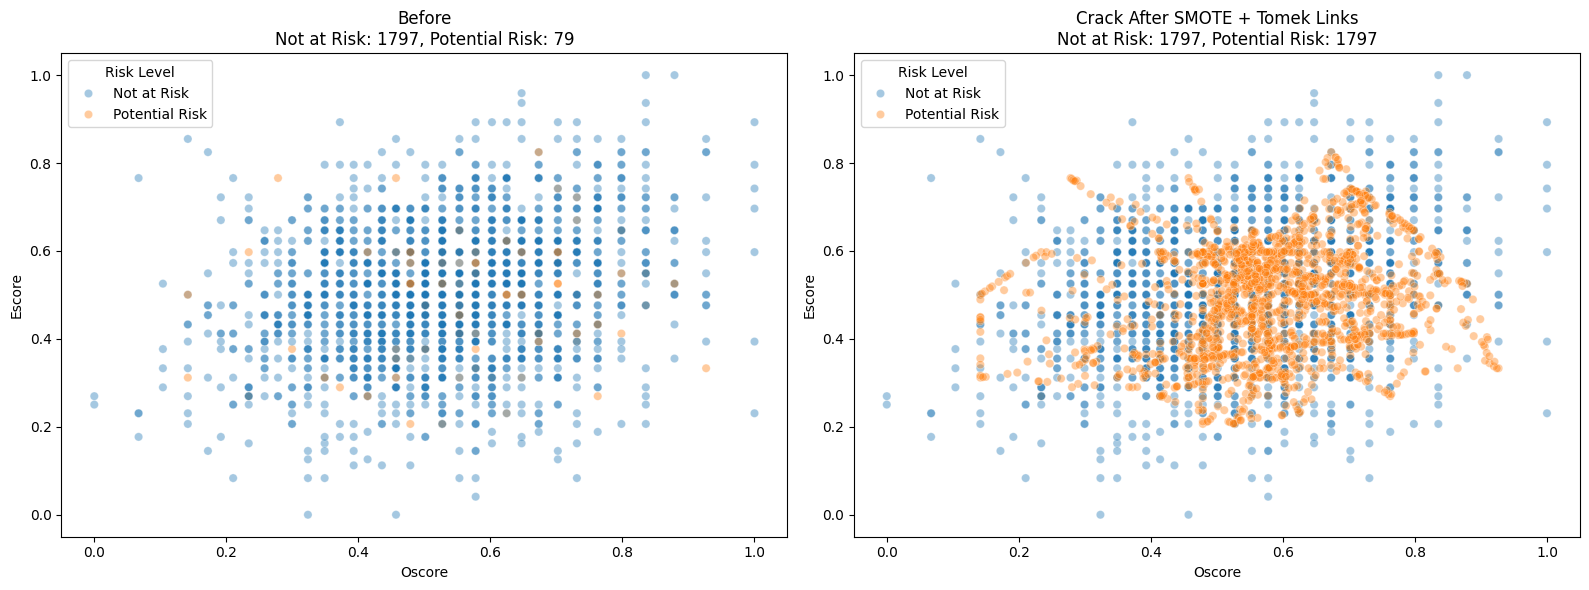

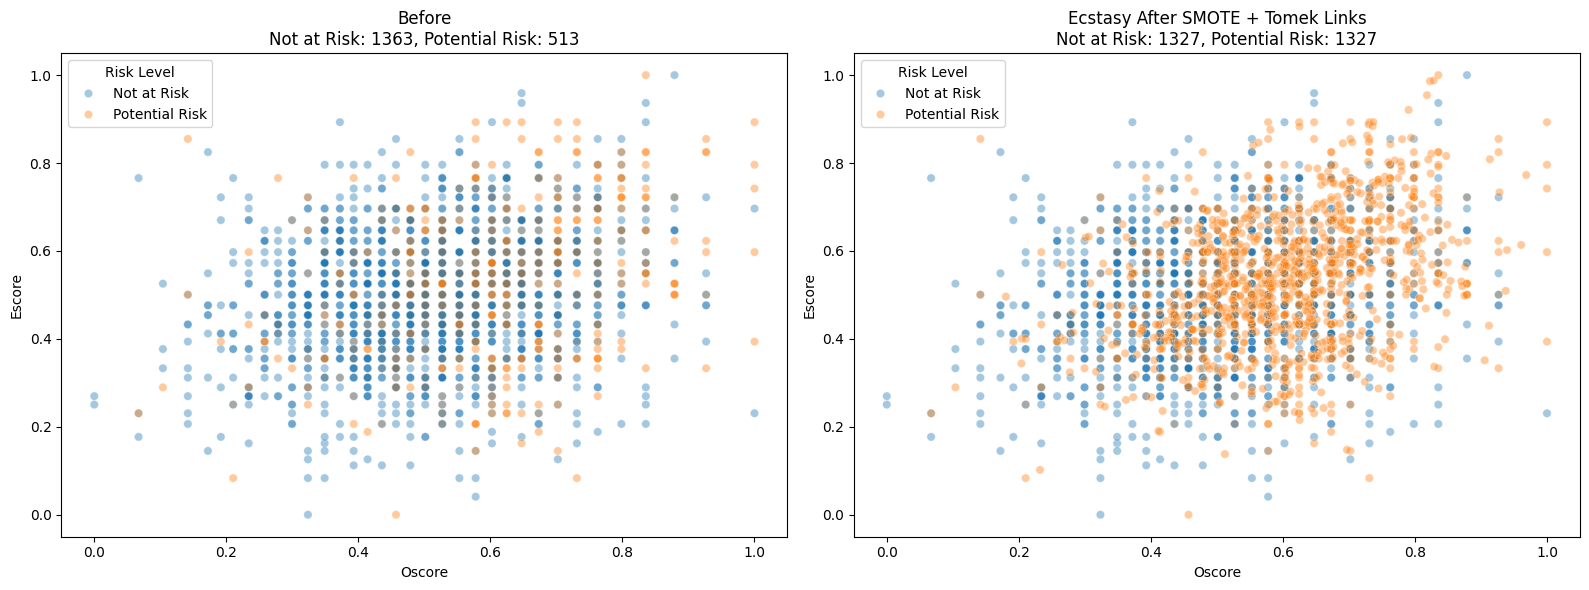

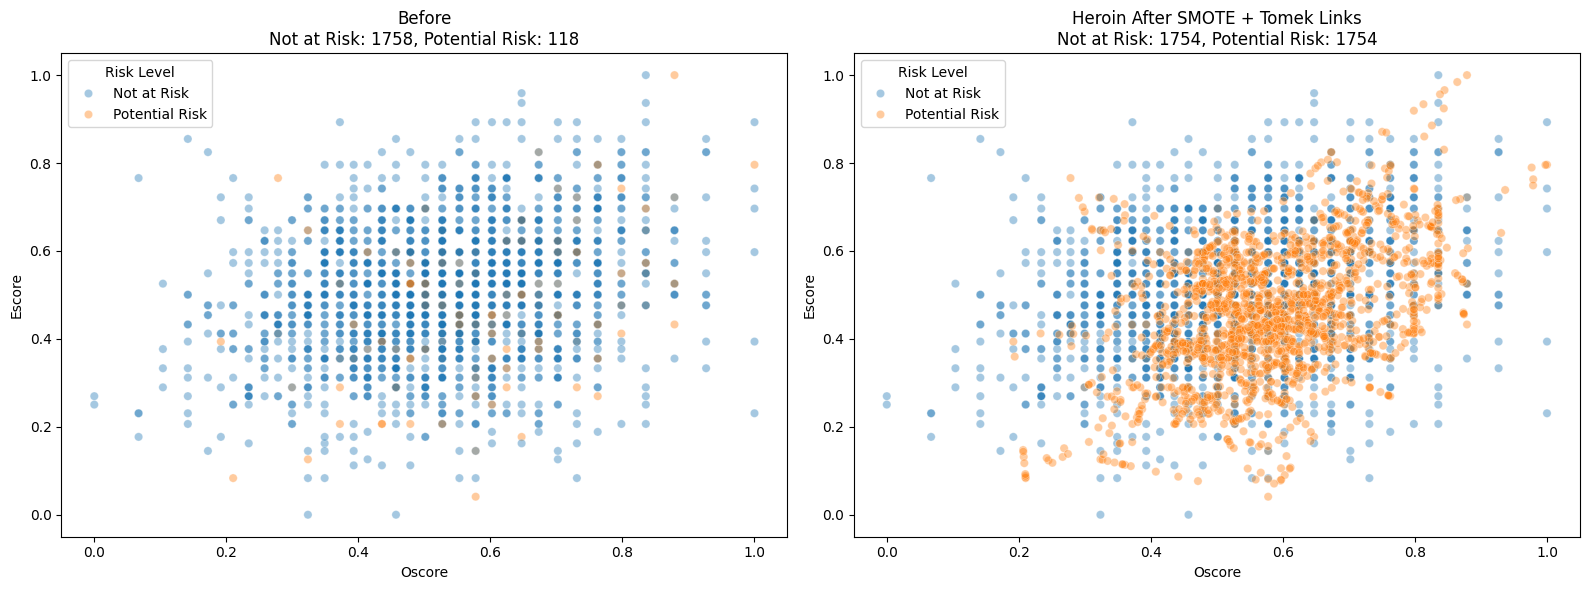

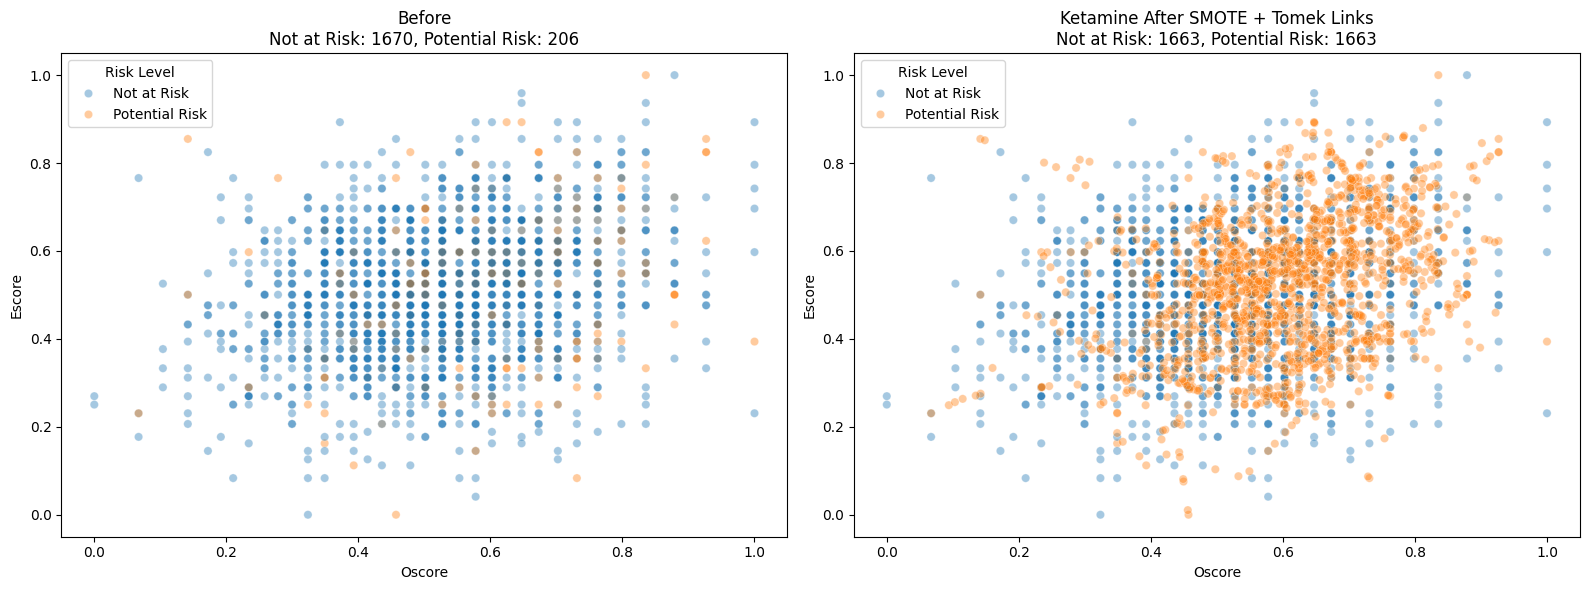

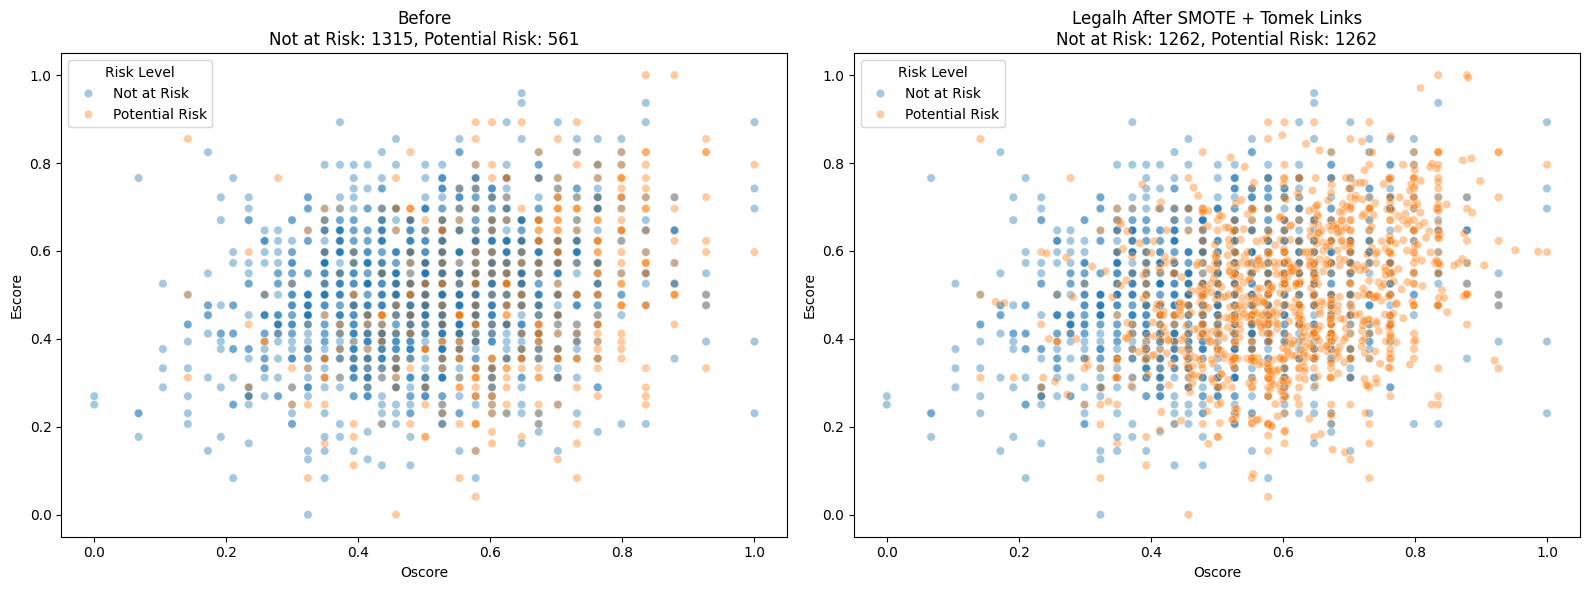

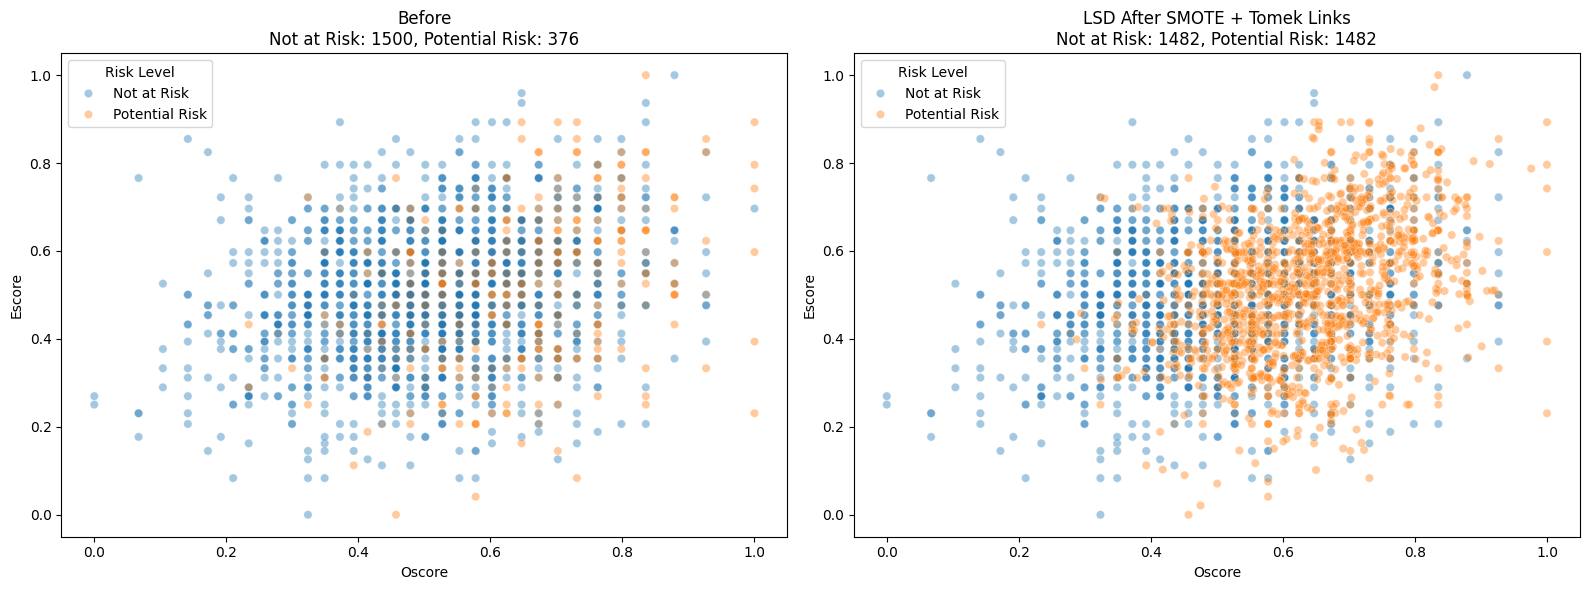

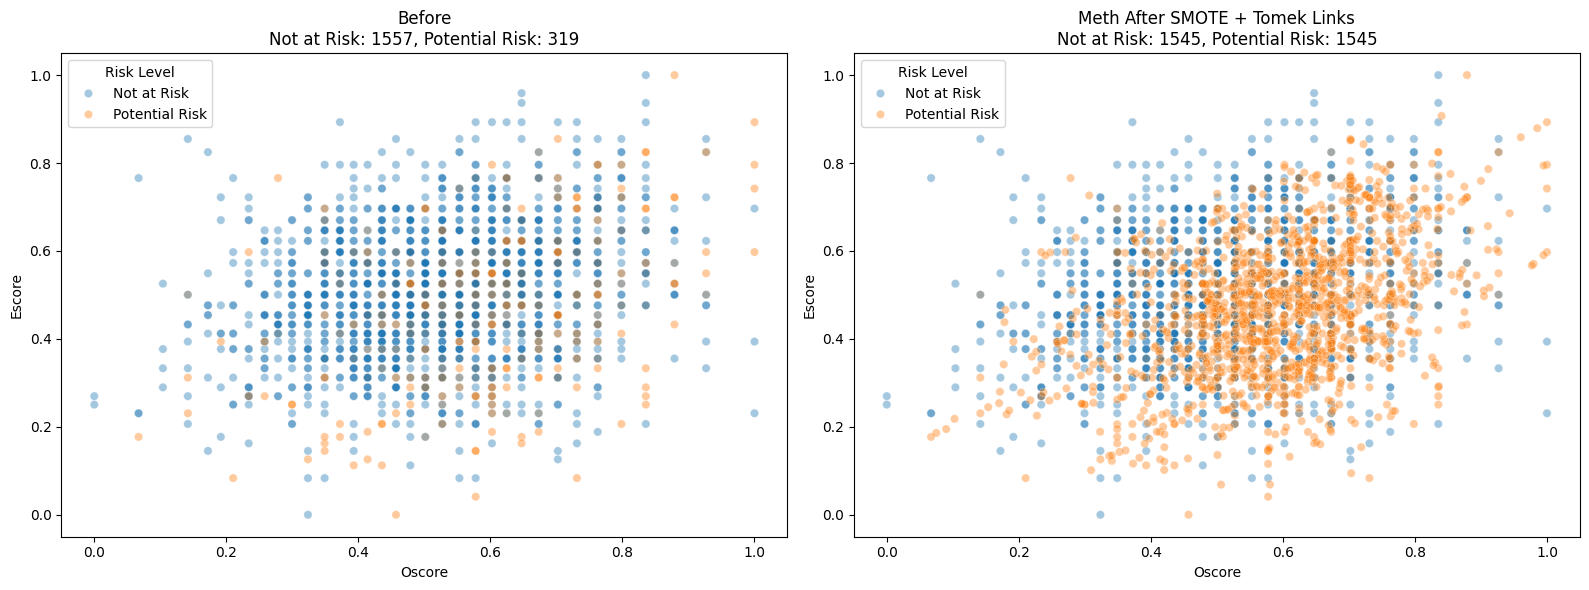

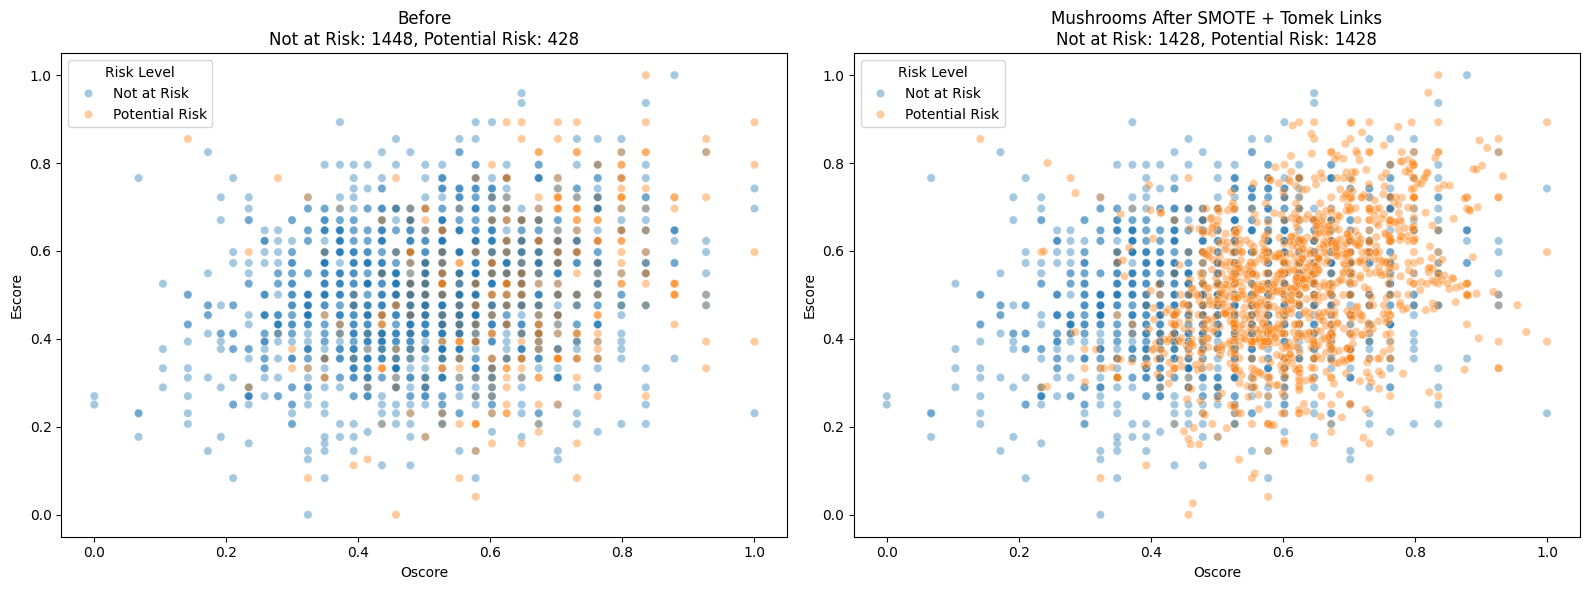

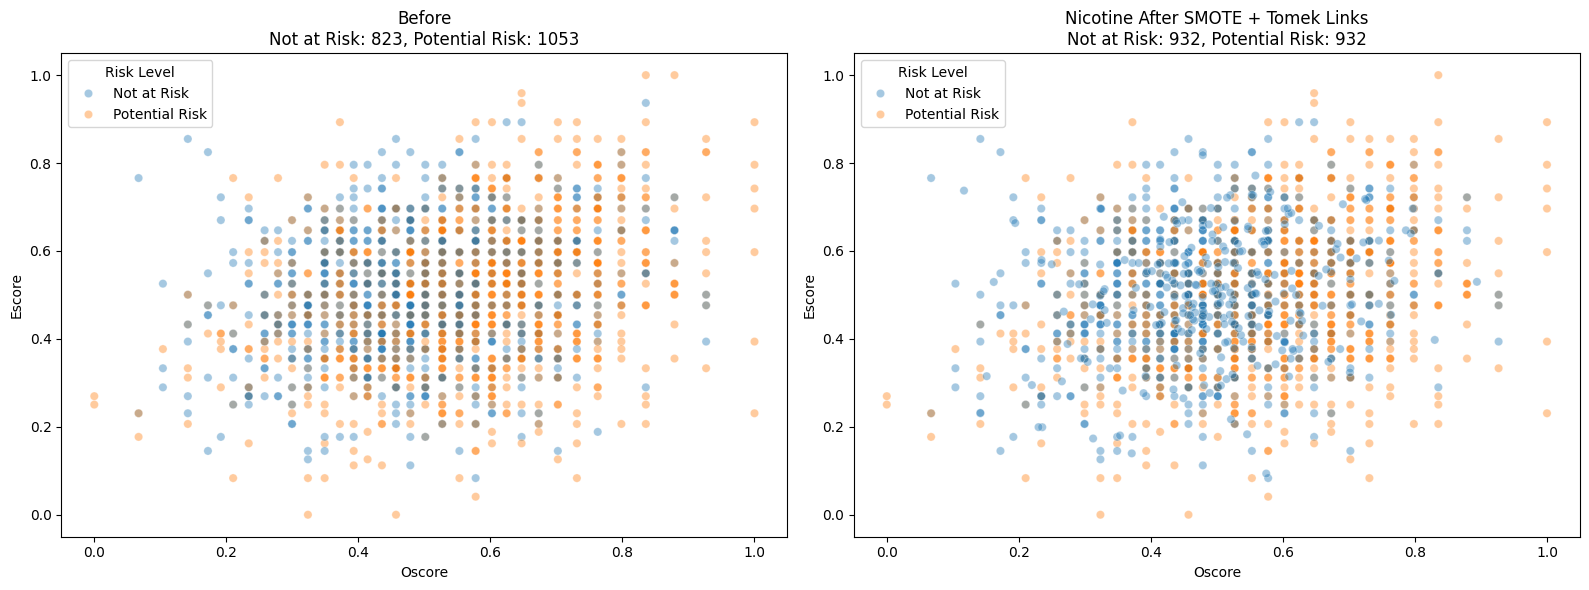

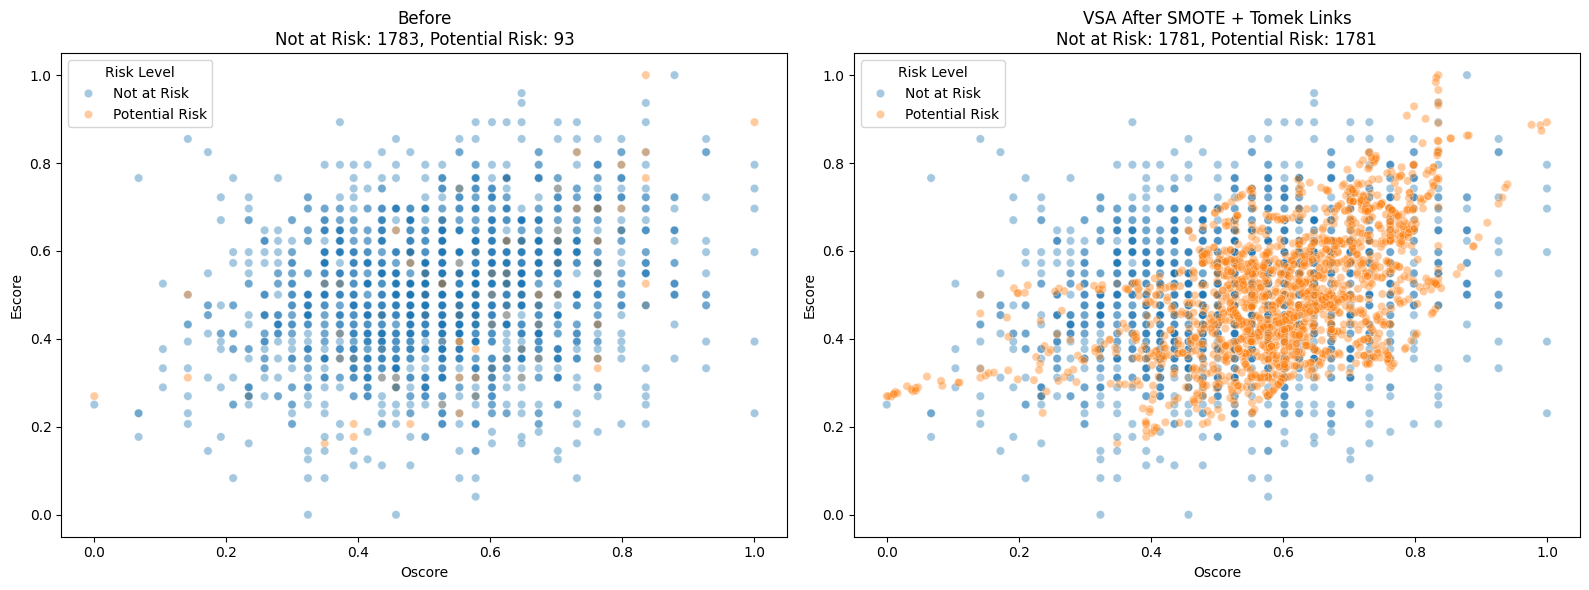

In [75]:
var1 = "Oscore"
var2 = "Escore"

for drug in Y.columns:
    X_lah, y_lah = plot(X, Y[drug], combine.SMOTETomek(), f"{drug} After SMOTE + Tomek Links", var1, var2)

# # oversampling
# plot(X, drug, over.RandomOverSampler(), "After Random Over-sampling", var1, var2)
# plot(X, drug, over.BorderlineSMOTE(), "After Borderline SMOTE", var1, var2)
# plot(X, drug, over.SMOTE(), "After SMOTE", var1, var2)
# plot(X, drug, over.ADASYN(), "After ADASYN", var1, var2)


# # undersampling
# plot(X, drug, under.RandomUnderSampler(), "After Random Under-sampling", var1, var2)
# plot(X, drug, under.AllKNN(), "After All k-NN", var1, var2)
# plot(X, drug, under.OneSidedSelection(), "After One-sided Selection", var1, var2)
# plot(X, drug, under.RepeatedEditedNearestNeighbours(), "After Repeated ENN", var1, var2)
# plot(X, drug, under.NearMiss(), "After Near Miss", var1, var2)
# plot(X, drug, under.TomekLinks(), "After Tomek Links", var1, var2)
# plot(X, drug, under.InstanceHardnessThreshold(), "After Instance Hardness", var1, var2)
# plot(X, drug, under.CondensedNearestNeighbour(), "After Condensed Nearest Neighbors", var1, var2)
# plot(X, drug, under.EditedNearestNeighbours(), "After Edited Nearest Neighbors", var1, var2)